## LDA-analysis
Here we import our LDA_model and initialize it using our dataset. 

In [15]:
# !python -m spacy download nb_core_news_md # Uncomment to download Norsk Bokmål language package.

In [1]:
from src.models.LDA import LDA, plot_topic_distribution, plot_coherence_scores
import pandas as pd

dataframe = pd.read_csv('../../dataset/nou_hearings.csv')
texts = dataframe.text.tolist()
lda = LDA(data=texts, no_below=15, no_above=0.5, language='/Users/nicolaisivesind/miniconda3/lib/python3.11/site-packages/nb_core_news_md/nb_core_news_md-3.7.0')

### Estimate optimal number of topics

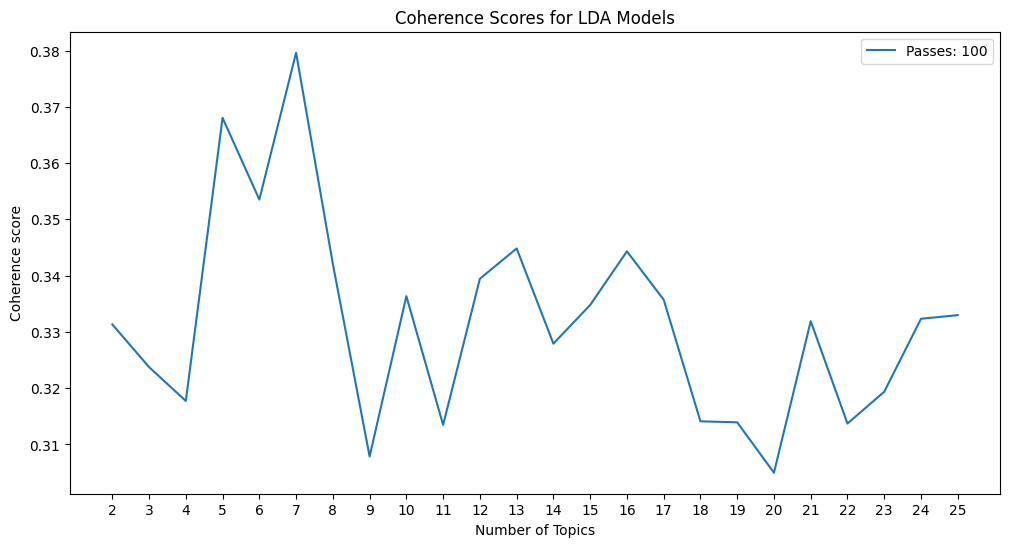

In [2]:

coherence_values, model_list, topic_range, passes = lda.calculate_lda_model_coherences(topic_interval=(2, 25), passes=100)

plot_coherence_scores(topic_range=topic_range, coherence_values=coherence_values, passes=passes, savefig='LDA_coherence-2')

### Build model and Print topics

In [18]:
model = lda.build_LDA_model(num_topics=8, passes=1000)
topics = model.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.024*"norge" + 0.022*"norsk" + 0.020*"utslipp" + 0.017*"energi" + 0.013*"øke" + 0.012*"redusere" + 0.012*"fornybar" + 0.011*"industri" + 0.010*"produksjon" + 0.010*"kraft"')
(1, '0.019*"støtte" + 0.017*"kommune" + 0.016*"burde" + 0.013*"utvalg" + 0.013*"krav" + 0.012*"natur" + 0.010*"anbefaling" + 0.010*"bruk" + 0.009*"nasjonal" + 0.008*"prioritere"')
(2, '0.019*"norge" + 0.017*"skog" + 0.016*"tiltak" + 0.013*"dag" + 0.013*"utvalg" + 0.013*"effekt" + 0.012*"burde" + 0.012*"forhold" + 0.011*"eu" + 0.011*"rapport"')
(3, '0.016*"utslipp" + 0.013*"øke" + 0.012*"redusere" + 0.011*"norsk" + 0.010*"bærekraftig" + 0.010*"nasjonal" + 0.009*"bidra" + 0.008*"bruk" + 0.008*"måte" + 0.008*"norge"')
(4, '0.020*"natur" + 0.015*"klima" + 0.013*"stor" + 0.012*"grønn" + 0.011*"miljø" + 0.011*"derfor" + 0.010*"omstilling" + 0.010*"økonomisk" + 0.009*"norge" + 0.008*"behov"')
(5, '0.031*"omstilling" + 0.024*"utvalg" + 0.021*"klimapolitikk" + 0.015*"klimautvalget" + 0.014*"lavutslippssamfunn" + 0.013

### Calculate text-topic pairs

In [19]:
predictions = lda.predict_topics(model=model, relevancy=False)
dataframe['topic_predictions'] = predictions

dataframe.head(n=100)

,actor,text,date,actor_label,topic_predictions
0,Abelia,Abelia er foreningen for kunnskaps- og teknolo...,30.01.2024,Interessegruppe,"{'topic': 4, 'confidence': 0.63}"
1,Abelia,Innledningsvis vil vi takke for det grundige o...,30.01.2024,Interessegruppe,"{'topic': 5, 'confidence': 0.94}"
2,Abelia,Vi er enig med utvalget i at klimapolitikken m...,30.01.2024,Interessegruppe,"{'topic': 5, 'confidence': 0.95}"
3,Abelia,Over de siste åtte årene har Abelia målt norsk...,30.01.2024,Interessegruppe,"{'topic': 4, 'confidence': 0.45}"
4,Abelia,Vi vil gjerne oppfordre til at det blir satt s...,30.01.2024,Interessegruppe,"{'topic': 5, 'confidence': 0.79}"
...,...,...,...,...,...
95,Animalia AS,Bærekraftmål nr. 13 er å “handle umiddelbart f...,30.01.2024,Bedrift,"{'topic': 4, 'confidence': 0.55}"
96,Animalia AS,FAO avholdt sin 43. Generalkonferanse for mats...,30.01.2024,Bedrift,"{'topic': 3, 'confidence': 0.7}"
97,Animalia AS,Den første FAO initierte kongressen om bærekra...,30.01.2024,Bedrift,"{'topic': 4, 'confidence': 0.78}"
98,Animalia AS,I Parisavtalens fortale heter det: “Partene i ...,30.01.2024,Bedrift,"{'topic': 4, 'confidence': 0.49}"


## Plot distributions

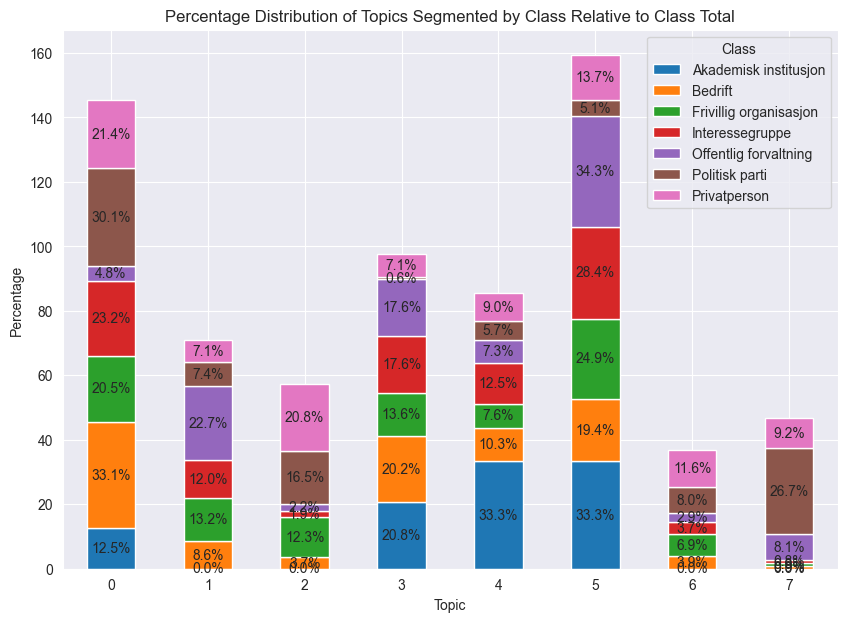

In [20]:
plot_topic_distribution(dataframe, savefig='LDA_Paragraph_distribution')

### Extract arguments

In [1]:
from src.models.LDA import LDA, plot_topic_distribution, plot_coherence_scores
import pandas as pd

dataframe = pd.read_csv('../../dataset/nou_hearings_full_text.csv')
texts = dataframe.text.tolist()
lda = LDA(data=texts, no_below=15, no_above=0.5, language='/Users/nicolaisivesind/miniconda3/lib/python3.11/site-packages/nb_core_news_md/nb_core_news_md-3.7.0')
lda = lda.extract_arguments(texts)

Processing Documents:   0%|          | 1/212 [00:19<1:08:35, 19.50s/it]

topics 2
1
0
1
1
0
1
0
0
1
0
1
1
1
1
1
0
0
0
0
0
0
0
1
0
0

Like sikkert som at Norge hadde et godt utgangspunkt ved inngangen til 2010-tallet, er at pilene nå peker i feil retning. Abelias omstillingsbarometer 2023 viser at Norge taper kampen om de klokeste hodene, ligger etter i bruk av muliggjørende teknologier, og utdanner færre med spisskompetanse innen teknologi. Vi gjør mye for å lage fornybar energi, men lite for å spare på den energien vi har. Selv om vi gjør det bra på flere bærekraftsmål, er norsk økonomi fremdeles konsentrert rundt tradisjonelle næringer som olje og gass. Næringsstrukturen vår er ikke bærekraftig og det vil kreve et virkelig krafttak, i form av omprioritering av ressurser, ny kompetanse og større oppmerksomhet på nye vekstnæringer, for å få til den nødvendige omstillingen.

Vi vil gjerne oppfordre til at det blir satt særlig fokus på følgende punkter i oppfølgingen av utvalgets anbefalinger: Vi vil spesielt fremheve betydningen av å inkludere sirkulær innov

Processing Documents:   1%|          | 2/212 [00:40<1:11:13, 20.35s/it]

topics 10
2
6
3
4
4
3
5
1
7
6
6
5
9
8
9
5
9
8
2
6
5
5
6
6
3
0
3
1
9
6
6
5
9
4
2
2
9
2
4
3
2
2
0
3
8
2
3
6
3
8
9
3
7
7
1
2
1
2
0
8
8
9
4
5
1
6
6
4
8
6
4
2
0
5
0
2
7
1
5
0
7
0
2
1
5
3
3
3
8
9
7
1
2
4
7
4
3
9
8
2
0
8
7
6
1
7
1
4
1
6
0

Like sikkert som at Norge hadde et godt utgangspunkt ved inngangen til 2010-tallet, er at pilene nå peker i feil retning. Abelias omstillingsbarometer 2023 viser at Norge taper kampen om de klokeste hodene, ligger etter i bruk av muliggjørende teknologier, og utdanner færre med spisskompetanse innen teknologi. Vi gjør mye for å lage fornybar energi, men lite for å spare på den energien vi har. Selv om vi gjør det bra på flere bærekraftsmål, er norsk økonomi fremdeles konsentrert rundt tradisjonelle næringer som olje og gass. Næringsstrukturen vår er ikke bærekraftig og det vil kreve et virkelig krafttak, i form av omprioritering av ressurser, ny kompetanse og større oppmerksomhet på nye vekstnæringer, for å få til den nødvendige omstillingen.

Vi vil gjerne

Processing Documents:   1%|▏         | 3/212 [00:59<1:09:10, 19.86s/it]

topics 9
7
0
8
7
6
4
1
3

Like sikkert som at Norge hadde et godt utgangspunkt ved inngangen til 2010-tallet, er at pilene nå peker i feil retning. Abelias omstillingsbarometer 2023 viser at Norge taper kampen om de klokeste hodene, ligger etter i bruk av muliggjørende teknologier, og utdanner færre med spisskompetanse innen teknologi. Vi gjør mye for å lage fornybar energi, men lite for å spare på den energien vi har. Selv om vi gjør det bra på flere bærekraftsmål, er norsk økonomi fremdeles konsentrert rundt tradisjonelle næringer som olje og gass. Næringsstrukturen vår er ikke bærekraftig og det vil kreve et virkelig krafttak, i form av omprioritering av ressurser, ny kompetanse og større oppmerksomhet på nye vekstnæringer, for å få til den nødvendige omstillingen.

Vi vil gjerne oppfordre til at det blir satt særlig fokus på følgende punkter i oppfølgingen av utvalgets anbefalinger: Vi vil spesielt fremheve betydningen av å inkludere sirkulær innovasjon som en sentral del av strate

Processing Documents:   2%|▏         | 4/212 [01:20<1:10:08, 20.23s/it]

topics 5
2
3
1
3
4
2
3
3
2
3
2
2
0
1
3
4
1
0
1
2
0
1
3
0
4
1
2
4
1
3
0
2
2
1
0
4
4
0
3
2
3
3
3
3
0
1
3
0
3
3
2
4
1
3
1
0
1
2
1
2
1
3
3
3
0
2
0
4
2
2
0
0
4
1
2
2
3
4
2
1
2
3
3
3
1
1
3
2
2
0
3
2
0
0
1
3
4
2
4
4
2
1
3
1
1
4
3
3
3
3
4
1
1
1
4
3
1
1
3
1
1
4
0
1
4
4
1

Like sikkert som at Norge hadde et godt utgangspunkt ved inngangen til 2010-tallet, er at pilene nå peker i feil retning. Abelias omstillingsbarometer 2023 viser at Norge taper kampen om de klokeste hodene, ligger etter i bruk av muliggjørende teknologier, og utdanner færre med spisskompetanse innen teknologi. Vi gjør mye for å lage fornybar energi, men lite for å spare på den energien vi har. Selv om vi gjør det bra på flere bærekraftsmål, er norsk økonomi fremdeles konsentrert rundt tradisjonelle næringer som olje og gass. Næringsstrukturen vår er ikke bærekraftig og det vil kreve et virkelig krafttak, i form av omprioritering av ressurser, ny kompetanse og større oppmerksomhet på nye vekstnæringer, for å få til den nødvendi

Processing Documents:   2%|▏         | 5/212 [01:40<1:09:12, 20.06s/it]

topics 12
6
6
1
10
2
8
0
0
3
4
2
11
5
10
7
2
2
7
7
7
3
0
10
3
7
7
3
0

Like sikkert som at Norge hadde et godt utgangspunkt ved inngangen til 2010-tallet, er at pilene nå peker i feil retning. Abelias omstillingsbarometer 2023 viser at Norge taper kampen om de klokeste hodene, ligger etter i bruk av muliggjørende teknologier, og utdanner færre med spisskompetanse innen teknologi. Vi gjør mye for å lage fornybar energi, men lite for å spare på den energien vi har. Selv om vi gjør det bra på flere bærekraftsmål, er norsk økonomi fremdeles konsentrert rundt tradisjonelle næringer som olje og gass. Næringsstrukturen vår er ikke bærekraftig og det vil kreve et virkelig krafttak, i form av omprioritering av ressurser, ny kompetanse og større oppmerksomhet på nye vekstnæringer, for å få til den nødvendige omstillingen.

Vi vil gjerne oppfordre til at det blir satt særlig fokus på følgende punkter i oppfølgingen av utvalgets anbefalinger: Vi vil spesielt fremheve betydningen av å inkludere sir

Processing Documents:   3%|▎         | 6/212 [02:00<1:09:26, 20.23s/it]

topics 4
3
0
3
0
2
2
2
0
2
3
2
1
3
1
1
0
2
3
0
0
2
0
0
1
0
0
3
1
3
0
3
1
0
1
0
2
2
3
1
3
0
1
0
2
2
1
0
1
0
3
2
0
1
0
3
2
0
3
1
3
0
0
3
3
3
2
1
0
3
1
3
0
3
1
3
0
0
2
0
0
2
3
3
2
3
0
1
0
2
0
2
2
0
1
1

Like sikkert som at Norge hadde et godt utgangspunkt ved inngangen til 2010-tallet, er at pilene nå peker i feil retning. Abelias omstillingsbarometer 2023 viser at Norge taper kampen om de klokeste hodene, ligger etter i bruk av muliggjørende teknologier, og utdanner færre med spisskompetanse innen teknologi. Vi gjør mye for å lage fornybar energi, men lite for å spare på den energien vi har. Selv om vi gjør det bra på flere bærekraftsmål, er norsk økonomi fremdeles konsentrert rundt tradisjonelle næringer som olje og gass. Næringsstrukturen vår er ikke bærekraftig og det vil kreve et virkelig krafttak, i form av omprioritering av ressurser, ny kompetanse og større oppmerksomhet på nye vekstnæringer, for å få til den nødvendige omstillingen.

Vi vil gjerne oppfordre til at det blir satt s

Processing Documents:   3%|▎         | 7/212 [02:21<1:09:14, 20.27s/it]

topics 12
10
3
0
0
0
7
2
1
7
6
4
9
11
3
0
3
5
11
8
4
6
5
10
5
2
8
11
9
9
8
10
0
2
11
11
0
5
1
8
2
2
3
9
4
6
0
9
1
9
1
0
9
10
11
1
10
6
11
0
6
0
3
5
3
6
0
11
3
5
0
4
7
6
0
1
1
0
4
3
0
6
4
4

Like sikkert som at Norge hadde et godt utgangspunkt ved inngangen til 2010-tallet, er at pilene nå peker i feil retning. Abelias omstillingsbarometer 2023 viser at Norge taper kampen om de klokeste hodene, ligger etter i bruk av muliggjørende teknologier, og utdanner færre med spisskompetanse innen teknologi. Vi gjør mye for å lage fornybar energi, men lite for å spare på den energien vi har. Selv om vi gjør det bra på flere bærekraftsmål, er norsk økonomi fremdeles konsentrert rundt tradisjonelle næringer som olje og gass. Næringsstrukturen vår er ikke bærekraftig og det vil kreve et virkelig krafttak, i form av omprioritering av ressurser, ny kompetanse og større oppmerksomhet på nye vekstnæringer, for å få til den nødvendige omstillingen.

Vi vil gjerne oppfordre til at det blir satt særlig foku

Processing Documents:   4%|▍         | 8/212 [02:42<1:10:27, 20.72s/it]

topics 3
2
0
1
0
1
1
1
1
1
0
1
1
1
0
1
2
1
0
2
0
0
1
1
1
0
2
1
0
0
0
2
0
2
1
1
2
0
2
0
2
1
2
2
1
1
2
2
0
0
1
0
2
0
1
0
0
0
0
0
1
2
1
2
1
1
0
0
0
0
0
0
0
2
2
0
0
2
2
2
2
0
0
1
2
0
2
2
2
0
0
1
1
1
0
2
0
2
0
0
2
1
1
1
0
1
1
0
1
2
1
0
2
1
0
2
2
2
2
0
0
0
1
2
2
0
2
0
1
2
0
2
1
0
1
2
2
1
0
2
1
0
1
1
2
2
1
1
0
0
1
0
1

Like sikkert som at Norge hadde et godt utgangspunkt ved inngangen til 2010-tallet, er at pilene nå peker i feil retning. Abelias omstillingsbarometer 2023 viser at Norge taper kampen om de klokeste hodene, ligger etter i bruk av muliggjørende teknologier, og utdanner færre med spisskompetanse innen teknologi. Vi gjør mye for å lage fornybar energi, men lite for å spare på den energien vi har. Selv om vi gjør det bra på flere bærekraftsmål, er norsk økonomi fremdeles konsentrert rundt tradisjonelle næringer som olje og gass. Næringsstrukturen vår er ikke bærekraftig og det vil kreve et virkelig krafttak, i form av omprioritering av ressurser, ny kompetanse og større oppmerksomh

Processing Documents:   4%|▍         | 9/212 [03:03<1:10:13, 20.75s/it]

topics 9
4
4
8
4
6
4
2
0
7
7
5
6
4
7
3
4
2
4
3
8
1
1
3
2
8
0
6
1
6
5
1
6
5
4
8
6
3
1
5
7
0
1
6
1
0
7
6
5
1
4
6
7
4
5
7
3
7
3
2
6
5
1
2
6

Like sikkert som at Norge hadde et godt utgangspunkt ved inngangen til 2010-tallet, er at pilene nå peker i feil retning. Abelias omstillingsbarometer 2023 viser at Norge taper kampen om de klokeste hodene, ligger etter i bruk av muliggjørende teknologier, og utdanner færre med spisskompetanse innen teknologi. Vi gjør mye for å lage fornybar energi, men lite for å spare på den energien vi har. Selv om vi gjør det bra på flere bærekraftsmål, er norsk økonomi fremdeles konsentrert rundt tradisjonelle næringer som olje og gass. Næringsstrukturen vår er ikke bærekraftig og det vil kreve et virkelig krafttak, i form av omprioritering av ressurser, ny kompetanse og større oppmerksomhet på nye vekstnæringer, for å få til den nødvendige omstillingen.

Vi vil gjerne oppfordre til at det blir satt særlig fokus på følgende punkter i oppfølgingen av utvalgets an

Processing Documents:   5%|▍         | 10/212 [03:23<1:08:24, 20.32s/it]

topics 11
7
1
8
10
0
0
1
1
1
5
4
7
5
0
10
3
7
3

Like sikkert som at Norge hadde et godt utgangspunkt ved inngangen til 2010-tallet, er at pilene nå peker i feil retning. Abelias omstillingsbarometer 2023 viser at Norge taper kampen om de klokeste hodene, ligger etter i bruk av muliggjørende teknologier, og utdanner færre med spisskompetanse innen teknologi. Vi gjør mye for å lage fornybar energi, men lite for å spare på den energien vi har. Selv om vi gjør det bra på flere bærekraftsmål, er norsk økonomi fremdeles konsentrert rundt tradisjonelle næringer som olje og gass. Næringsstrukturen vår er ikke bærekraftig og det vil kreve et virkelig krafttak, i form av omprioritering av ressurser, ny kompetanse og større oppmerksomhet på nye vekstnæringer, for å få til den nødvendige omstillingen.

Vi vil gjerne oppfordre til at det blir satt særlig fokus på følgende punkter i oppfølgingen av utvalgets anbefalinger: Vi vil spesielt fremheve betydningen av å inkludere sirkulær innovasjon som e

Processing Documents:   5%|▍         | 10/212 [03:23<1:08:25, 20.33s/it]


KeyboardInterrupt: 